In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import cv2

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
import io
df=pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [0]:
labels=df["label"]
labels=np.array(labels)

In [88]:
#Y_train=Y_train.reshape((1,Y_train.shape[0]))
labels

array([1, 0, 1, ..., 7, 6, 9])

In [0]:
data=df.drop("label",axis=1)

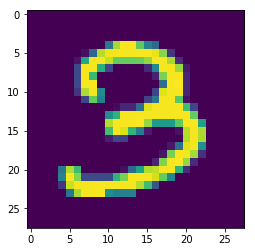

3


(42000, 28, 28)

In [94]:
data=np.array(data)
data=data.reshape(data.shape[0],int(data.shape[1]**0.5),int(data.shape[1]**0.5))
data.shape
plt.imshow(data[14][:][:])
plt.show()
print(labels[14])
data.shape

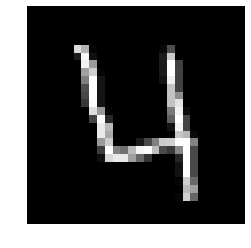

4


In [95]:
plt.imshow(data[3],cmap="gray")
plt.axis('off')
plt.show()
print(labels[3])

In [0]:
data=data/255
data=data.reshape(data.shape[0],28,28,1)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(data, labels, test_size=0.2, shuffle= True)
#Creating training data and labels along with validation set and validation labels

In [0]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout
from keras.layers import Activation
#X_train=X_train.reshape(X_train.shape[0],28,28,1)

In [0]:
input_shape=(28,28,1)
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',input_shape=input_shape,activation='relu',use_bias=False))
#model.add(BatchNormalization(axis=3))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',input_shape=input_shape,use_bias=False))
model.add(Activation('relu'))
#model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [106]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        288       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 26, 26, 64)        18432     
_________________________________________________________________
activation_31 (Activation)   (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
activation_32 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               2769152   
__________

In [107]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,Y_train,validation_data=(X_valid,Y_valid),epochs=28,batch_size=32)

Train on 33600 samples, validate on 8400 samples
Epoch 1/28
33600/33600 [==============================] - 9s 257us/step - loss: 0.4600 - acc: 0.8512 - val_loss: 0.1800 - val_acc: 0.9454
Epoch 2/28
33600/33600 [==============================] - 7s 220us/step - loss: 0.1957 - acc: 0.9401 - val_loss: 0.1305 - val_acc: 0.9588
Epoch 3/28
33600/33600 [==============================] - 7s 221us/step - loss: 0.1339 - acc: 0.9594 - val_loss: 0.1003 - val_acc: 0.9692
Epoch 4/28
33600/33600 [==============================] - 7s 221us/step - loss: 0.0959 - acc: 0.9691 - val_loss: 0.0830 - val_acc: 0.9752
Epoch 5/28
33600/33600 [==============================] - 7s 220us/step - loss: 0.0703 - acc: 0.9785 - val_loss: 0.0836 - val_acc: 0.9739
Epoch 6/28
33600/33600 [==============================] - 7s 221us/step - loss: 0.0574 - acc: 0.9818 - val_loss: 0.0632 - val_acc: 0.9812
Epoch 7/28
33600/33600 [==============================] - 7s 221us/step - loss: 0.0470 - acc: 0.9850 - val_loss: 0.0628 - v

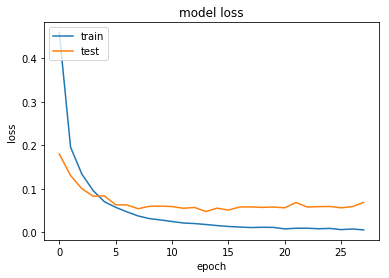

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As you can see from the graph if we stop at around 15 or 12 epochs we can get even better accuracy.

In [0]:
from google.colab import files
uploaded = files.upload()


In [0]:
import io
test=pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [0]:
test=np.array(test)
test.shape
test=test.reshape(test.shape[0],28,28,1)
test_predictions=model.predict_classes(test)

In [112]:
print(test_predictions)

[2 0 9 ... 3 9 2]


In [0]:
from google.colab import files
uploaded = files.upload()
submission =pd.read_csv(io.BytesIO(uploaded['sample_submission.csv']))
#= pd.read_csv(r"C:\Users\YASHVARDHAN\Desktop\Digits\sample_submission.csv")

In [0]:
imageid=submission['ImageId']

In [0]:
data_final = {'ImageId': imageid, 'Label': test_predictions }
#data_final

In [0]:
submission1 = pd.DataFrame(data=data_final)
#submission1

In [0]:
submission1.to_csv('submission4.csv', sep=',', index=False)

In [117]:
from google.colab import files
files.download('submission4.csv')
print(1)

1


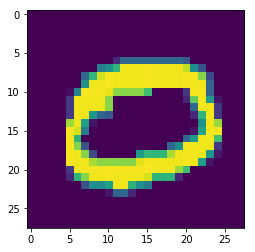

0


In [83]:
test=test.reshape(test.shape[0],28,28)
plt.imshow(test[1])
plt.show()
print(test_predictions[1])

This model achieved test accuracy of 98.742% on Kaggle.